# Задание 2

### Выделить и посчитать ложки и сахар

# 1. Исходное изображение

In [1]:
import cv2
import matplotlib.pyplot as plt 
from scipy import ndimage as nd
import numpy as np

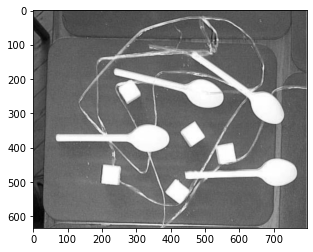

In [2]:
image = cv2.imread('0.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')

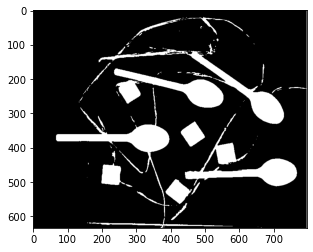

In [3]:
_, thresholdMarkers = cv2.threshold(image, 170, 255, cv2.THRESH_BINARY)
plt.imshow(thresholdMarkers, cmap="gray")

# 1.2 Избавляемся от шума

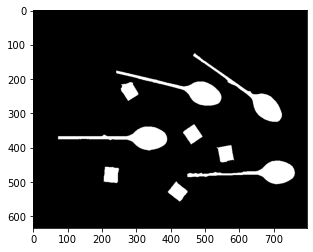

In [4]:
kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, ksize = (13, 13))
threshold = cv2.erode(thresholdMarkers, kernel1)
plt.imshow(threshold, cmap="gray")

# 2. Считаем и выделяем сахар

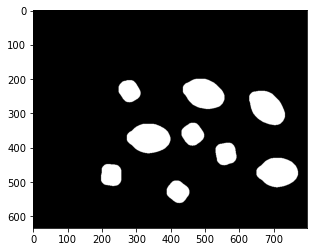

In [5]:
kernel2erode = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, ksize = (22, 22))
kernel2dilate = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, ksize = (40, 40))
verificationImage = cv2.erode(threshold, kernel2erode)
verificationImage = cv2.dilate(verificationImage, kernel2dilate)
plt.imshow(verificationImage, cmap="gray")

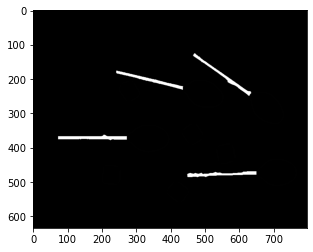

In [6]:
spoonHandle = threshold - verificationImage
plt.imshow(spoonHandle, cmap="gray")

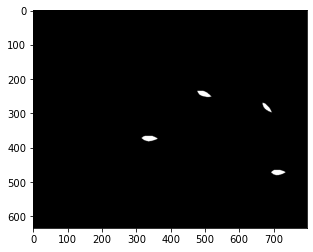

In [7]:
kernel3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, ksize = (70, 70))
spoon = cv2.erode(verificationImage, kernel3)
plt.imshow(spoon, cmap="gray")

In [8]:
CountSpoon, markers1 = cv2.connectedComponents(spoon)
CountSpoon= CountSpoon-1

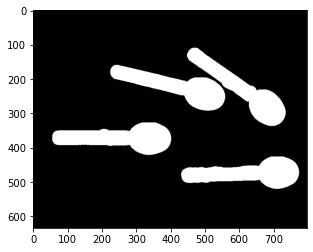

In [9]:
kernel4 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, ksize = (80, 80))
kernel5 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, ksize = (35, 35))
enlargedSpoons = cv2.dilate(spoon, kernel4)
enlargedHandle = cv2.dilate(spoonHandle, kernel5)
enlargedSpoons[enlargedHandle==255]=255
plt.imshow(enlargedSpoons, cmap="gray")

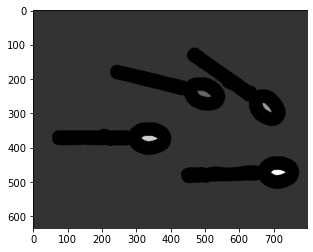

In [10]:
markers1 +=1
markers1[markers1==1]=0
markers1[enlargedSpoons==0]=1
plt.imshow(markers1, cmap= "gray")

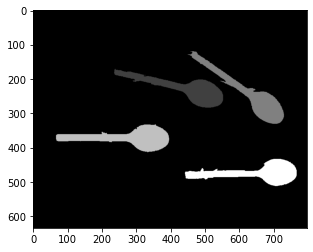

In [13]:
image1 = cv2.imread('0.png', cv2.COLOR_BGR2GRAY)
spoonMarkers = cv2.watershed(image1,markers1)
spoonMarkers[spoonMarkers==-1]=1
spoonMarkers=spoonMarkers-1
plt.imshow(spoonMarkers, cmap='gray')

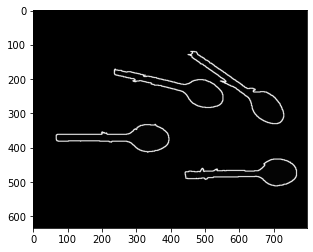

In [14]:
spoonMarkers = np.uint8(spoonMarkers)
contours1, hierarchy = cv2.findContours( spoonMarkers, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(spoonMarkers, contours1, -1, (255,0,0), 2)
plt.imshow(spoonMarkers,cmap='gray')

4

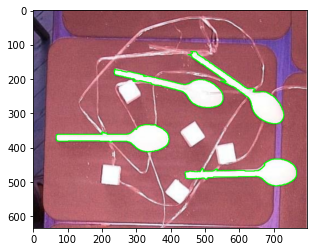

In [15]:
image1[spoonMarkers==255] = [0,255,0]
plt.imshow(image1,cmap='gray')
CountSpoon

# 3. Считаем и выделяем сахар

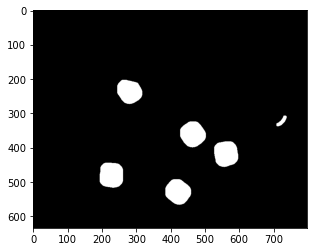

In [25]:
sugar = verificationImage - enlargedSpoons
_, sugar = cv2.threshold(sugar, 170, 255, cv2.THRESH_BINARY)
kernel7 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, ksize = (10, 10))
sugar = cv2.dilate(sugar, kernel7)
plt.imshow(sugar, cmap="gray")

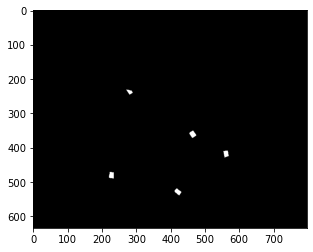

In [17]:
kernel6 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, ksize = (55, 55))
sugar2 = cv2.erode(sugar, kernel6)
plt.imshow(sugar2, cmap= "gray")

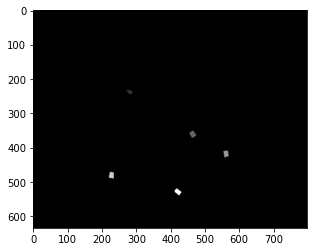

In [18]:

CountSugar, markers2 = cv2.connectedComponents(sugar2)
CountSugar = CountSugar-1
plt.imshow(markers2, cmap= "gray")


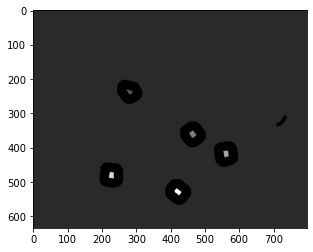

In [19]:
markers2 +=1
markers2[markers2==1]=0
markers2[sugar==0]=1
plt.imshow(markers2, cmap= "gray")

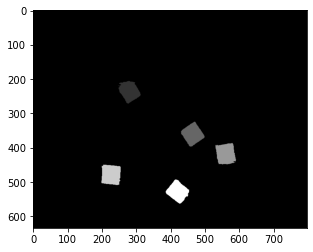

In [22]:
image2 = cv2.imread('0.png', cv2.COLOR_BGR2GRAY)
sugar = cv2.watershed(image2,markers2)
sugar[sugar==-1]=1
sugar=sugar-1
plt.imshow(sugar, cmap='gray')

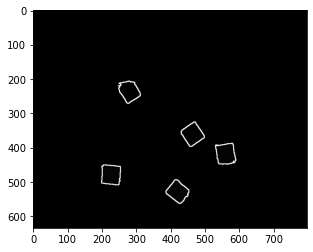

In [23]:
sugar = np.uint8(sugar)
contours2, hierarchy = cv2.findContours( sugar, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(sugar, contours2, -1, (255,0,0), 2)
plt.imshow(sugar,cmap='gray')

5

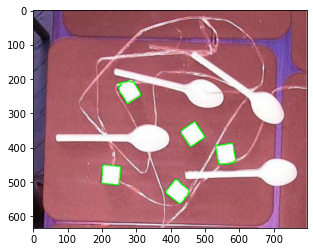

In [24]:
image2[sugar==255] = [0,255,0]
plt.imshow(image2,cmap='gray')
CountSugar